 Replicating Fig. 2 about spatial-temporal receptive fields from the Jiang & Rao paper.

In [1]:
import os, sys
sys.path.insert(0, os.path.abspath('../.'))
import os.path as op
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn import metrics
#import scikitplot as skplt
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import NullLocator
import seaborn as sns
import scienceplots 
plt.style.use("science")
from IPython.display import set_matplotlib_formats
%config InlineBackend.figure_formats = ['svg']

import utils

In [2]:
pip install scikit-plot 

Note: you may need to restart the kernel to use updated packages.


In [3]:
plt.rcParams["font.size"] = 16

 Space-Time Receptive Fields

In [4]:
import os
os.makedirs("figures", exist_ok=True)

In [5]:
STA = np.load("results/strf/STRF_final.npy")
STA_avg = STA.mean(axis=2)
U = np.load("results/strf/RF.npy").T

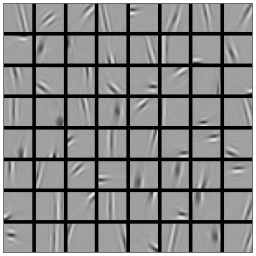

In [6]:
fig, ax = utils.plot_spatial_rf(U[:64], size=(4.5,4.5))
plt.savefig("figures/RF.pdf", bbox_inches="tight")

In [7]:
strf_list = [12, 28, 85, 18]

In [8]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False

<>:12: SyntaxWarning: invalid escape sequence '\#'
<>:12: SyntaxWarning: invalid escape sequence '\#'
/tmp/ipykernel_912331/4063513657.py:12: SyntaxWarning: invalid escape sequence '\#'
  axes[i, 0].set_ylabel(f"$\#{n_idx+1}$", )


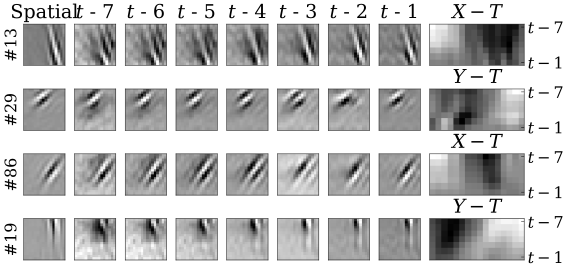

In [9]:
fig, axes = plt.subplots(nrows=4, ncols=9, 
    gridspec_kw={
        'width_ratios':[1, 1, 1, 1, 1, 1, 1, 1, 16/7],
    }, figsize=[9, 4.5])
for i, n_idx in enumerate(strf_list):
    c = 0
    stim_i = STA_avg[:, :, n_idx]
    stim_i = (stim_i - stim_i[3:].min()) / (stim_i[3:].max() - stim_i[3:].min())
    axes[i, 0].imshow(U[n_idx].reshape(16, 16), cmap='gray')
    if i == 0:
        axes[i, 0].set_title("Spatial", )
    axes[i, 0].set_ylabel(f"$\#{n_idx+1}$", )
    axes[i, 0].set_xticks([])
    axes[i, 0].set_yticks([])
    for t in range(1, 8):
        axes[i, t].imshow(stim_i[2+t].reshape(16, 16), cmap='gray')
        if i == 0:
            axes[i, t].set_title(f"$t$ - {7-t+1}", )
        axes[i, t].set_xticks([])
        axes[i, t].set_yticks([])
    xt = stim_i[3:]
    for t in range(7):
        xt[t] = (xt[t] - xt[t].mean()) / xt[t].std()
    xt = xt.reshape(7, 16, 16)
    if i % 2 == 0:
        xt_a = xt.mean(axis=1) # average over vertical(y)
    else:
        xt_a = xt.mean(axis=2) # average over horizontal(x)

    axes[i, 8].imshow(xt_a, cmap='gray')
    axes[i, 8].set_yticks([0, 6])
    axes[i, 8].set_yticklabels([r"$t-7$", r"$t-1$"])
    axes[i, 8].set_yticklabels([r"$t-7$", r"$t-1$"])
    axes[i, 8].yaxis.tick_right()
    axes[i, 8].tick_params(axis='both', which='minor', left=False, right=False)
    if i % 2 == 0:
        axes[i, 8].set_title(r"$X - T$", )
    else:
        axes[i, 8].set_title(r"$Y - T$", )
    axes[i, 8].set_xticks([])
#plt.subplots_adjust(hspace=1)

fig.savefig("figures/strf.pdf", bbox_inches='tight')

In [10]:
# natural video example
result_dict = np.load("results/inf_example/result_dict_forest.npz")
I_bar = result_dict["I_bar"]
I_hat = result_dict["I_hat"]
I = result_dict["I"]

In [11]:
b = 156
I_b = I[b]
I_bar_b = I_bar[b]
I_hat_b = I_hat[b]
I_err_b = (I_b - I_bar_b)
I_err_b = (I_err_b - I_err_b.min()) / (I_err_b.max() - I_err_b.min())

/tmp/ipykernel_912331/305617297.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


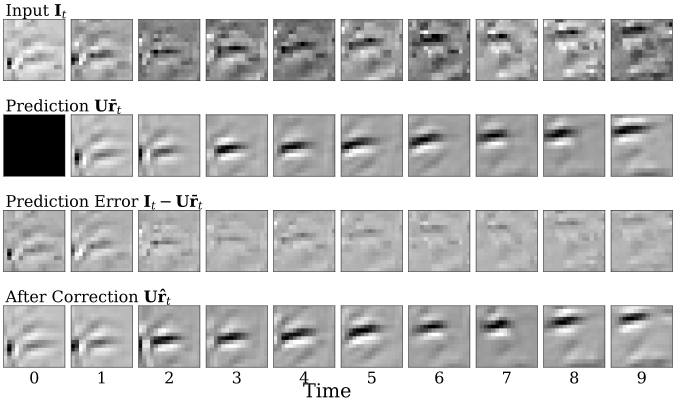

In [12]:
fig = plt.figure(figsize=[12, 6.5])
T = I_hat.shape[1]
N = 16
grid = plt.GridSpec(4, T, wspace=0.1, hspace=0.3)
for t in range(T):
    ax = fig.add_subplot(grid[0, t])
    ax.imshow(I_b[t].reshape(N, N), "gray")
    ax.set_xticks([])
    ax.set_yticks([]) 
    if t == 0:
        ax.text(0, -0.55, r"Input $\mathbf{I}_t$",  ha='left', va='bottom')
        
    ax = fig.add_subplot(grid[1, t])
    ax.imshow(I_bar_b[t].reshape(N, N), "gray")
    ax.set_xticks([])
    ax.set_yticks([])  
    if t == 0:
        ax.text(0, -0.55, r"Prediction $\mathbf{U}\mathbf{\bar{r}}_t$",  ha='left', va='bottom')

    ax = fig.add_subplot(grid[2, t])
    ax.imshow(I_err_b[t].reshape(N, N), "gray", vmin=0, vmax=1)
    ax.set_xticks([])
    ax.set_yticks([])
    if t == 0:
        ax.text(0, -0.55, r"Prediction Error $\mathbf{I}_t - \mathbf{U}\mathbf{\bar{r}}_t$",  ha='left', va='bottom')
        
    ax = fig.add_subplot(grid[3, t])
    ax.imshow(I_hat_b[t].reshape(N, N), "gray")
    ax.set_xticks([])
    ax.set_yticks([])
    if t == 0:
        ax.text(0, -0.55, r"After Correction $\mathbf{U}\mathbf{\hat{r}}_t$",  ha='left', va='bottom')
    ax.set_xlabel(f"{t}")
fig.supxlabel('Time', y=0.05)        
plt.tight_layout()

plt.savefig("figures/forest_inf.pdf", bbox_inches='tight')

In [13]:
### NORMALIZE
Rb = result_dict["R_hat"][b,:,:]
Rb = (Rb - Rb.min()) / (Rb.max() - Rb.min())
Rh = result_dict["R2_hat"][b]
Rh = (Rh - Rh.min()) / (Rh.max() - Rh.min())
w = result_dict["W"][b,:,:]
w = (w - w.min()) / (w.max() - w.min())

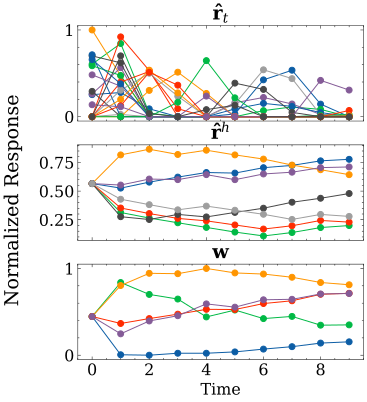

In [14]:
### PLOT
fig, axes = plt.subplots(3, 1, sharex=True, sharey=False, figsize=[5, 6])
ax_r = axes[0]
R_argmax = Rb.mean(axis=0).argsort()[::-1]
for i in R_argmax[:20]:
    ax_r.plot(Rb[:, i], marker='o')  
ax_r.set_xlim(-0.5, T - 0.5)
ax_r.set_title(r"$\mathbf{\hat{r}}_t$")

ax_r2 = axes[1]
for i in np.random.choice(range(Rh.shape[1]), 7, replace=False):
    ax_r2.plot(Rh[:, i], marker='o')  
ax_r2.set_xlim(-0.5, T - 0.5)
ax_r2.set_title(r"$\mathbf{\hat{r}}^h$") 

ax_rs = axes[2]
for i in range(w.shape[1]):
    ax_rs.plot(w[:, i], marker='o')  
ax_rs.set_xlim(-0.5, T - 0.5)
ax_rs.set_title(r"$\mathbf{w}$") 
ax_rs.set_xlabel("Time")

plt.tight_layout()
fig.supylabel("Normalized Response", x=-0.05)
plt.subplots_adjust(hspace=0.25)
plt.savefig("figures/forest_activation.pdf", bbox_inches='tight')